In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
from dsp.Runner import sequence_search, distance_based
from dsp.Problem import Problem
from dsp.Solver import DPSolver
from dtspx_ampl import ampl_solve

In [4]:
# Data and problem set up
# Time frame
T = 6
np.random.seed(10)
# Data
x_data = np.genfromtxt("/home/yash/PycharmProjects/DSP/data/x.csv", delimiter=",")
y_data = np.genfromtxt("/home/yash/PycharmProjects/DSP/data/y.csv", delimiter=",")

xy_data = np.stack([x_data, y_data], axis=2)

P = Problem(xy_data, T=6)
ALPHA = set(P.in_working_area)
H = 5

In [13]:
# Theoretical upper bound on Evaluations
the_x = np.arange(H+1)
the_y = [1]
for i in range(H):
    j = i+1
    num = 1
    mul = 63
    while j != 0: 
        num *= mul
        mul -= 1
        j -= 1
    the_y.append(num)
print(f"Theoretical evaluations by level: {the_y}")

Theoretical evaluations by level: [1, 63, 3906, 238266, 14295960, 843461640]


In [7]:
# Exhaustive search up to level 5
root = DPSolver(P, seq=[])
start = time.time().

ex_dist, ex_solv, ex_q_size, ex_total = sequence_search(root=root, available=set(ALPHA), problem=P, height=H)

end = time.time()
print(f"Processing Time:{end-start}")
print(f"""Best Sequences: {ex_solv}
Best Distances: {ex_dist}
Evaluations by level: {ex_q_size}
""")

Finished Processing Level # 0
Finished Processing Level # 1
Finished Processing Level # 2
Finished Processing Level # 3
Finished Processing Level # 4
Infeasible Count: 58971
Processing Time:48.097341775894165
Best Sequences: [Seq: [0], Seq: [0, 4, 0], Seq: [0, 32, 4, 0], Seq: [0, 32, 63, 4, 0], Seq: [0, 32, 30, 63, 4, 0], Seq: [0, 8, 5, 30, 63, 4, 0]]
Best Distances: [0, 29.60581726690888, 41.287005153386275, 42.86400500736726, 43.47402889875414, 46.59020901159798]
Evaluations by level: [1, 22, 295, 3137, 10001, 10001]



In [15]:
# Distance limiting expansion up to level 10 
root = DPSolver(P, seq=[])
start = time.time()
d_dist, d_solv, d_q_size, d_total = sequence_search(root=root, available=set(ALPHA), problem=P, func=distance_based, height=15)
end = time.time()
print(f"Processing Time:{end-start}")
print(f"""Best Sequences: {d_solv}
Best Distances: {d_dist}
Evaluations by level: {d_q_size}
""")

Finished Processing Level # 0
Finished Processing Level # 1
Finished Processing Level # 2
Finished Processing Level # 3
Finished Processing Level # 4
Finished Processing Level # 5
Finished Processing Level # 6
Finished Processing Level # 7
Finished Processing Level # 8
Finished Processing Level # 9
Finished Processing Level # 10
Finished Processing Level # 11
Finished Processing Level # 12
Finished Processing Level # 13
Finished Processing Level # 14
Infeasible Count: 417924
Processing Time:145.49092650413513
Best Sequences: [Seq: [0], Seq: [0, 4, 0], Seq: [0, 32, 4, 0], Seq: [0, 32, 63, 28, 0], Seq: [0, 5, 44, 63, 4, 0], Seq: [0, 15, 8, 30, 63, 4, 0], Seq: [0, 15, 8, 5, 30, 63, 4, 0], Seq: [0, 15, 8, 5, 44, 30, 63, 4, 0], Seq: [0, 15, 8, 5, 44, 12, 23, 61, 28, 0], Seq: [0, 15, 8, 5, 44, 30, 12, 23, 61, 28, 0], Seq: [0, 15, 8, 5, 44, 30, 12, 63, 23, 61, 28, 0], Seq: [0, 15, 8, 5, 44, 30, 12, 63, 23, 4, 61, 28, 0], Seq: [0, 33, 15, 5, 8, 44, 30, 4, 63, 12, 23, 61, 28, 0], Seq: [0, 33, 1

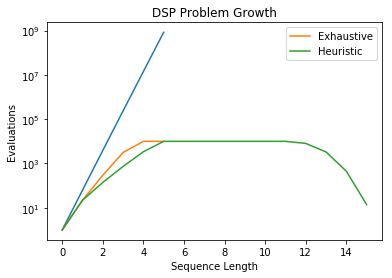

In [16]:
fig, ax = plt.subplots()

ax.semilogy(the_x, the_y)
# Exhaustive bounds 
ex_x = np.arange(H+1) 
ax.semilogy(ex_x, ex_q_size, label="Exhaustive")

# Distance cut bounds
d_x = np.arange(len(d_q_size))
ax.semilogy(d_x, d_q_size, label="Heuristic")

ax.legend()

ax.set(xlabel='Sequence Length', ylabel='Evaluations',
       title='DSP Problem Growth')

plt.show()


In [52]:
# AMPL Execution time for 5 ships
start = time.time()
ampl_solve(5)
end = time.time()
print(f"Processing Time:{end-start}")

n = 28

m = 72

Accepted: outlev                              = 2
Accepted: msk_dpar_optimizer_max_time         = 36000

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 11868           
  Cones                  : 0               
  Scalar variables       : 73903           
  Matrix variables       : 0               
  Integer variables      : 73831           

Optimizer started.
Mixed integer optimizer started.
Threads used: 4
Presolve started.
Presolve terminated. Time = 2.75
Presolved problem: 73880 variables, 7301 constraints, 315352 non-zeros
Presolved problem: 0 general integer, 73824 binary, 56 continuous
Clique table size: 358
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        1        1        0        NA                   4.0777594804e+01     NA          4.4   
0        1        1        0 

In [53]:
# AMPL Execution time for 10 ships
start = time.time()
ampl_solve(10)
end = time.time()
print(f"Processing Time:{end-start}")

n = 28

m = 72

Accepted: outlev                              = 2
Accepted: msk_dpar_optimizer_max_time         = 36000

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 11868           
  Cones                  : 0               
  Scalar variables       : 73903           
  Matrix variables       : 0               
  Integer variables      : 73831           

Optimizer started.
Mixed integer optimizer started.
Threads used: 4
Presolve started.
Presolve terminated. Time = 2.94
Presolved problem: 73880 variables, 7301 constraints, 315352 non-zeros
Presolved problem: 0 general integer, 73824 binary, 56 continuous
Clique table size: 358
BRANCHES RELAXS   ACT_NDS  DEPTH    BEST_INT_OBJ         BEST_RELAX_OBJ       REL_GAP(%)  TIME  
0        1        1        0        5.5433072352e+01     5.5433072352e+01     0.00e+00    4.7   
An optimal solution satisfyin